In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


IMPORTING REQUIRE LIBRARIES

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.validators.scatter.marker import SymbolValidator
import plotly.offline as pyo

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error



IMPORTING DATASET

In [ ]:
df=pd.read_csv("/content/StudentsPerformance.csv")

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.shape

(1000, 8)

CHECKING DUPLICATE VALUES

In [ ]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []


CHECKING DATA INFORMATION

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


CHECKING NULL VALUES

In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Observations :
Dataset do not have any null values.
There's no outliers in score as all values are in the range of 0-100.
All features are categorical.
Grades are require to measure students performance in exam.
Percdentage needs to calculate to allocate grade.

PERCENTAGE CALCULATION

In [ ]:
df['Percentage']= round(((df['math score']+df['reading score']+df['writing score'])/300)*100,2)

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


DATA ANALYSIS

In [ ]:
df.rename(columns={"race/ethnicity":"ethnicity","parental level of education":"parent_education"
                    ,"math score":"math","reading score":"reading","writing score":"writing",
                    "test preparation course":"pre"},inplace=True)
df.head()

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1.GENDER

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



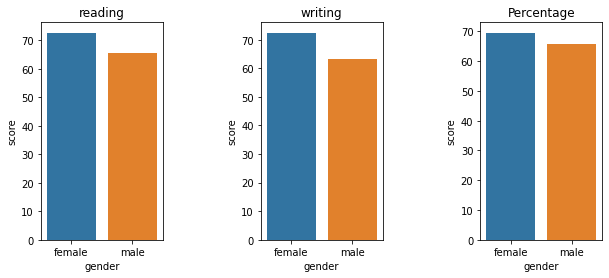

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = df.groupby("gender")[list(df.columns[-3:])[idx]].describe()
    sns.barplot(gender_df.index, gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(df.columns[-3:])[idx])
    
plt.show()

Observations:
Male scored better in math than female , 
Female scored better in Reading than Male , 
Female scored better in Writing than Male .

score distribution

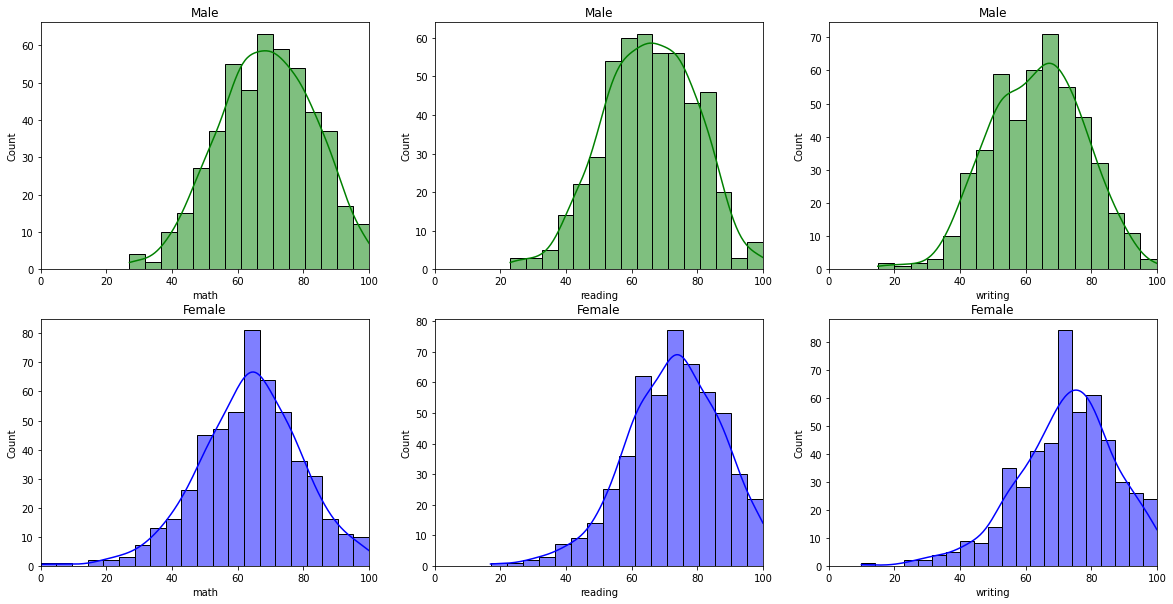

In [ ]:
fig , axes = plt.subplots(2,3, figsize=(20,10))
sns.histplot(df[df['gender'] =='male']['math'],kde=True,ax = axes[0][0],color='green')
sns.histplot(df[df['gender'] =='female']['math'],kde=True,ax= axes[1][0],color='blue')
sns.histplot(df[df['gender'] =='male']['reading'],kde=True,ax = axes[0][1],color='green')
sns.histplot(df[df['gender'] =='female']['reading'],kde=True,ax= axes[1][1],color='blue')
sns.histplot(df[df['gender'] =='male']['writing'],kde=True,ax = axes[0][2],color='green')
sns.histplot(df[df['gender'] =='female']['writing'],kde=True,ax = axes[1][2],color='blue')

for i in range(0,3):
    axes[0][i].set_title("Male")
    axes[1][i].set_title("Female")
    
    axes[0][i].set_xlim(0,100)
    axes[1][i].set_xlim(0,100)
plt.show()


Male's score is distributed at the center as compared with female.

2.GROUP

Group (Race/Ethnicity) affects grades

In [ ]:
import seaborn as sns

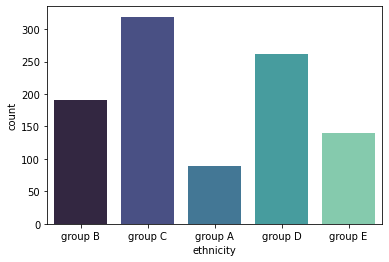

In [ ]:
sns.countplot(x = 'ethnicity', data = df, palette="mako")

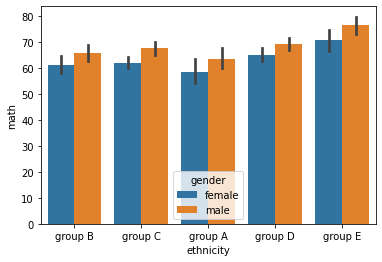

In [ ]:
sns.barplot(x = "ethnicity", y = "math", data = df, hue = 'gender')

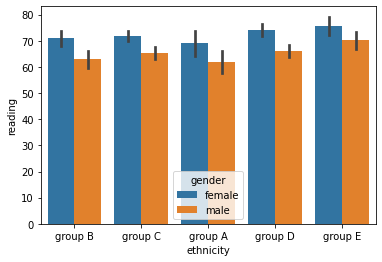

In [ ]:
sns.barplot(x = "ethnicity", y = "reading", data = df, hue = 'gender')

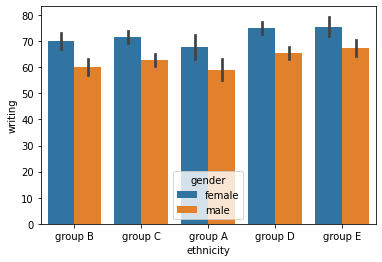

In [ ]:
sns.barplot(x = "ethnicity", y = "writing", data = df, hue = 'gender')

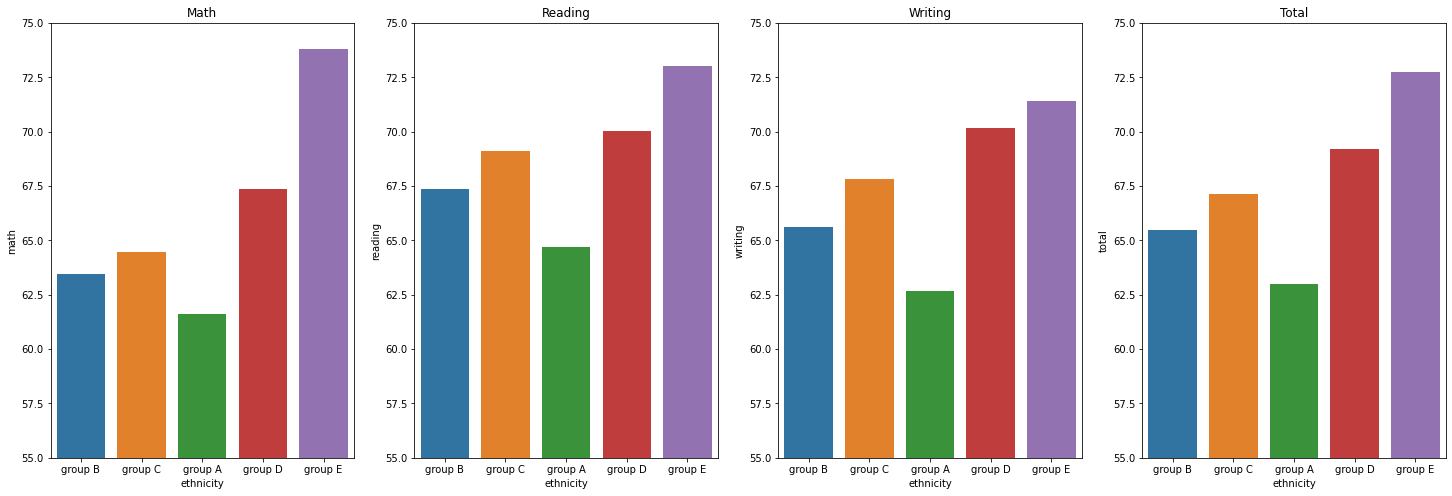

In [ ]:
df['total'] = (df['math'] + df['reading'] + df['writing']) / 3
fig , axes = plt.subplots(1,4, figsize=(25,8))
sns.barplot(data = df, x='ethnicity', y='math',ax = axes[0],ci=None)
axes[0].set_title("Math")
sns.barplot(data = df, x='ethnicity', y='reading',ax = axes[1],ci=None)
axes[1].set_title("Reading")
sns.barplot(data = df, x='ethnicity', y='writing',ax = axes[2],ci=None)
axes[2].set_title("Writing")
sns.barplot(data = df, x='ethnicity', y='total',ax = axes[3],ci=None)
axes[3].set_title("Total")

for i in range(0,4):
    axes[i].set_ylim(55,75)
plt.show()

Turns out Group E happens to be performing best in all subjects, while group A performs the worst

3. Parental level of education

Let's see how Parental level of education affects grades

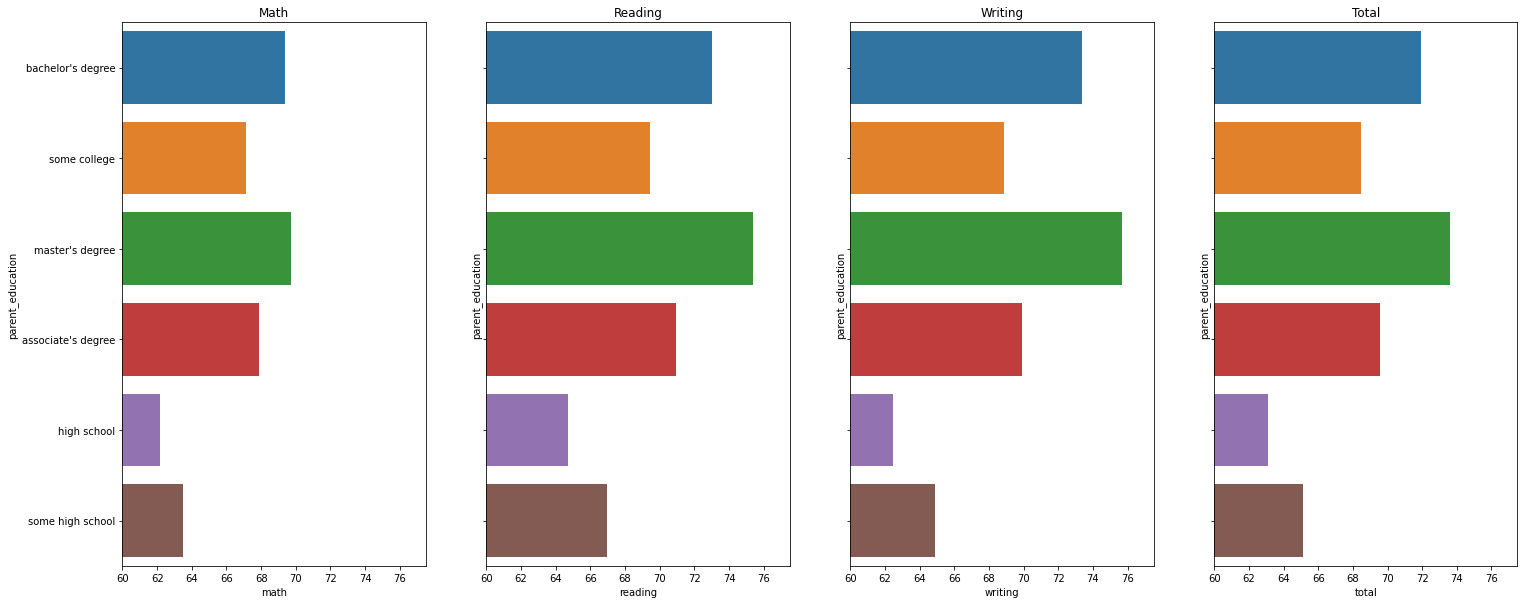

In [ ]:
fig , axes = plt.subplots(1,4, figsize=(25,10),sharey=True)
sns.barplot(data = df, y='parent_education', x='math',ax = axes[0],ci=None)
axes[0].set_title("Math")
sns.barplot(data = df, y='parent_education', x='reading',ax = axes[1],ci=None)
axes[1].set_title("Reading")
sns.barplot(data = df, y='parent_education', x='writing',ax = axes[2],ci=None)
axes[2].set_title("Writing")
sns.barplot(data = df, y='parent_education', x='total',ax = axes[3],ci=None)
axes[3].set_title("Total")
for i in range(0,4):
    axes[i].set_xlim(60,77.5)

plt.show()

Children with parents who have master level education, appear to get better grades and perform well in all aspects.

4. Test preparation Course

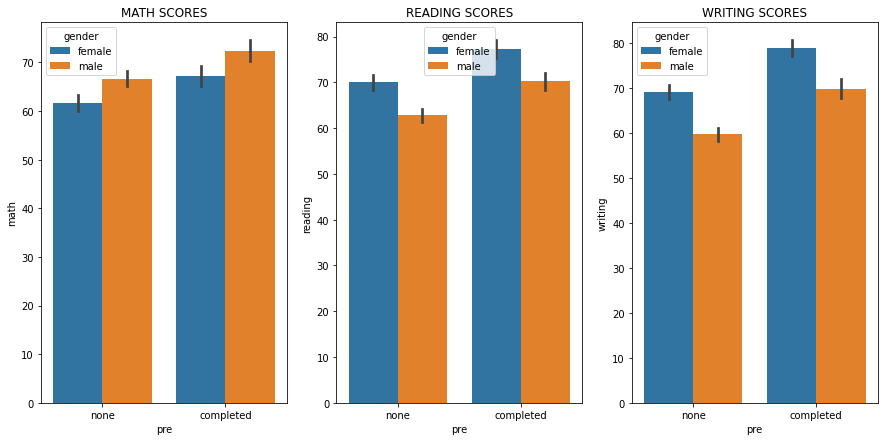

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
sns.barplot(x='pre',y='math',data=df,hue='gender')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='pre',y='reading',data=df,hue='gender')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='pre',y='writing',data=df,hue='gender')
plt.title('WRITING SCORES')
plt.show()


Text(0.5, 1.0, 'TOTAL')

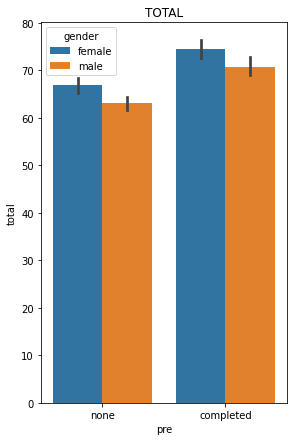

In [ ]:
df['total'] = (df['math'] + df['reading'] + df['writing']) / 3
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
sns.barplot(x='pre',y='total',data=df,hue='gender')
plt.title('TOTAL')

 students having done prep, score significantly more marks

Lunch

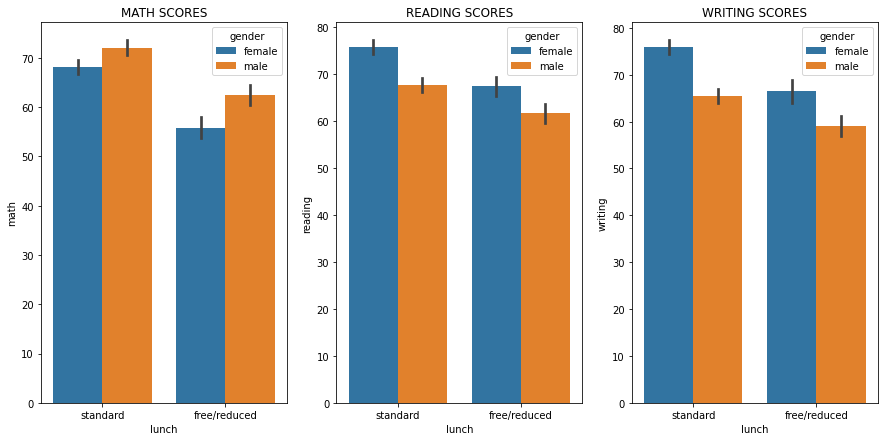

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
sns.barplot(x='lunch',y='math',data=df,hue='gender')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='lunch',y='reading',data=df,hue='gender')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='lunch',y='writing',data=df,hue='gender')
plt.title('WRITING SCORES')
plt.show()

Text(0.5, 1.0, 'TOTAL')

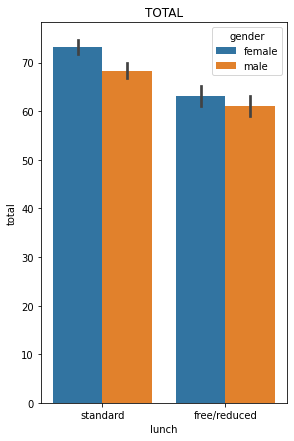

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
sns.barplot(x='lunch',y='total',data=df,hue='gender')
plt.title('TOTAL')

Students having standard lunch score more than those with free/reduced lunch

Processing the Data

In [ ]:
df.drop(['tmp','total'],axis=1,inplace=True)

X = df.drop(['math score', 'reading score', 'writing score'],axis=1)
y = df[['math score', 'reading score', 'writing score']]

In [ ]:
#Splitting the dataset now
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=100)

Modelling

In [ ]:
#Using KNN
mse = []
for i in range(2,101):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    mse.append(mean_squared_error(y_test,model.predict(X_test)))

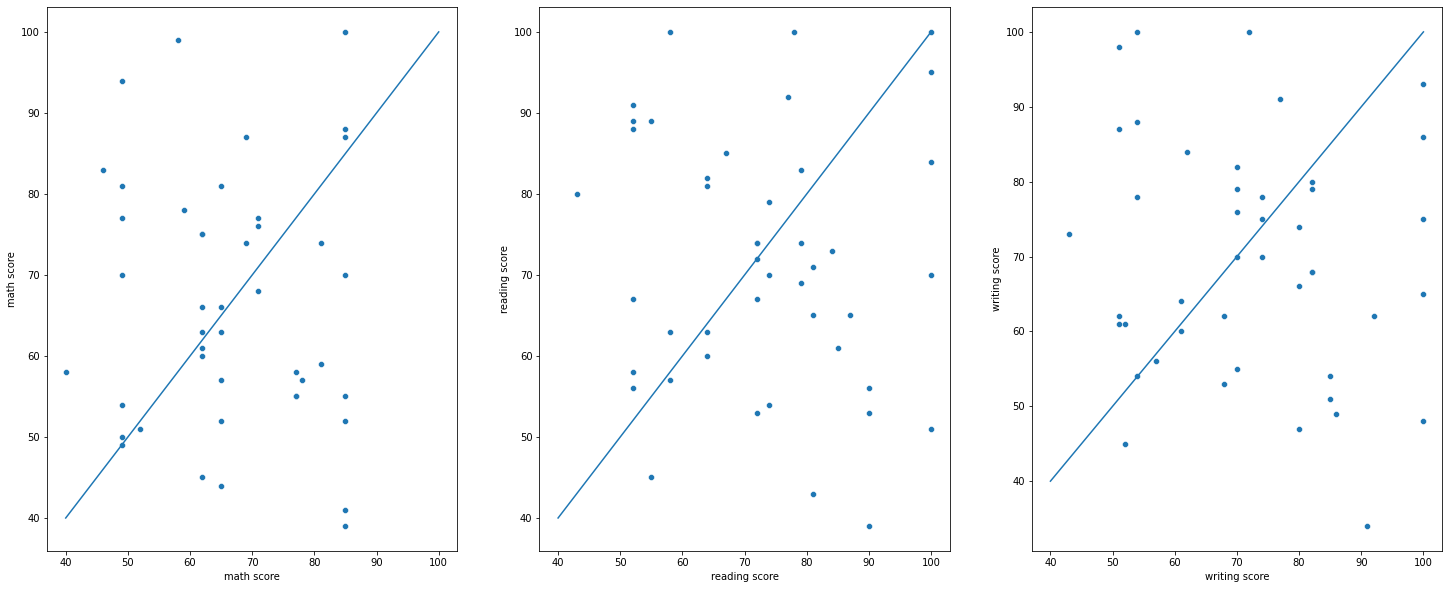

In [ ]:
model = KNeighborsClassifier(n_neighbors=80)
model.fit(X_train, y_train)
mse.append(mean_squared_error(y_test,model.predict(X_test)))

pred = model.predict(X_test)

pred = pd.DataFrame(pred,columns= y_test.columns)

fig , axes = plt.subplots(1,3, figsize=(25,10))
sns.scatterplot(x=pred['math score'], y=y_test['math score'],ax=axes[0])
axes[0].plot([40,100], [40,100])
sns.scatterplot(x=pred['reading score'], y=y_test['reading score'],ax=axes[1])
axes[1].plot([40,100], [40,100])
sns.scatterplot(x=pred['writing score'], y=y_test['writing score'],ax=axes[2])
axes[2].plot([40,100], [40,100])
plt.show()

LINEAR REGRESSION


In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [ ]:
y_pred = lr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96
